In [ ]:
from mwasis import *  # noqa: F403

## Wprowadzenie

Wiele danych jest uporządkowanych w czasie (lub w inny sposób)

- Jak wykryć anomalię ?
- Jak przewidywać ruch ?

\alert{Potrzebujemy model probabilistyczny }

## Reprezentacja ruchu telekomunikacyjnego

<!-- ![](event.pdf) -->




## Szereg czasowy

Szereg czasowy to realizacja procesu losowego (forma szumu)


### Modele

Formalnie szereg czasowy to wielowymiarowy wektor losowy

### Reguła łańcuchowa

$${\displaystyle \mathrm {P} (X_{1},\ldots ,X_{n})=\mathrm {P} (X_{n}|X_{1},\ldots ,X_{n-1})\cdot \mathrm {P} (X_{1},\ldots ,X_{n-1})}$$

\alert{Modelowanie rozkładu obecnej wartości pod warunkiem historii}



## Funkcja czasu{.allowframebreaks}

$$A_t=f(t)+\varepsilon_t$$

- Szybka i prosta metoda
- $\varepsilon_t$ i $\varepsilon_{t+1}$ raczej nie będą niezależne
- Oszacowania średnich dokładne, niepewności niedokładne.

### Facebook prophet

https://facebook.github.io/prophet/docs/quick_start.html
<!-- ![](prophet.p![prophet.png](attachment:f9ef89bb-8542-4836-b4c6-ed28ef82f13f.png)ng) -->

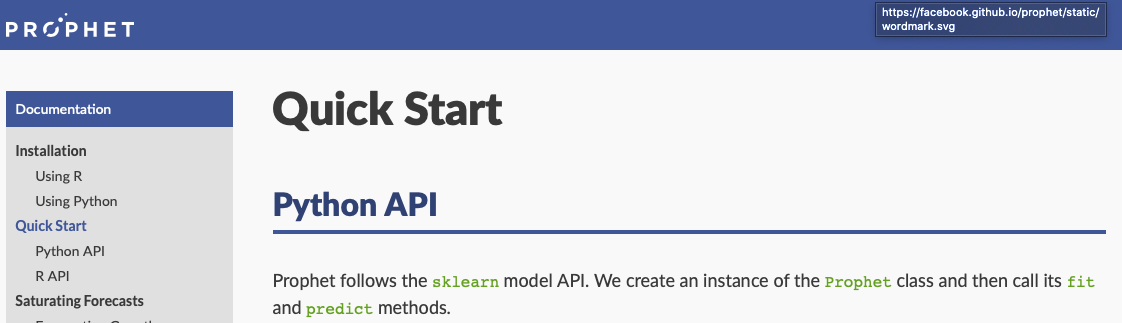

## Trend sezonowość i szum

$$X_t = S_t + T_t + R_t $$

- $S_t$ sezonowość
- $T_t$ trend
- $R_t$ szum losowy

## Autokorelacja

- $x_t$ i $x_{t+1}$ często są skorelowane
- Poprawny model musi uwzględnić autokorelację
- Najczęściej $x_{t}$  zależy od $x_{t-1}$ a nie od $t$


## Łańcuch Markowa

$$\mathrm {P} (X_{n}|X_{1},\ldots ,X_{n-1})=\mathrm {P} (X_{n}|X_{n-1})$$

\alert{$X$ może być z ciągłej przestrzeni stanów}

### Ukryty Łańcuch Markowa (HMM)

- $\mathrm {P} (S_{n}|S_{1},\ldots ,S_{n-1})=\mathrm {P} (S_{n}|S_{n-1})$
    - przejścia $T$

- $\mathrm {P} (X_n|S_{n})$
    - Emisje $E$

- $\mathrm {P} (X_n)=\sum\mathrm {P} (X_n|S_{n})\pi(S_{n})$
- `tfp.distributions.HiddenMarkovModel`


## Model AR(p)

- $X_{t}|X_{t-1}\sim Norm(aX_{t-1},\sigma)$
- $X_{t}=aX_{t-1} + \varepsilon_t$
- $\varepsilon\sim Norm(0,\sigma)$
- $X_{t}=a_1X_{t-1} + a_2X_{t-2}+\ldots \varepsilon_t$
- \alert{To tez jest proces markowa}

### Filtr cyfrowy

Model AR(n) to przedstawienie szeregu czasowego jako filtrowanego szumu białego filtrem cyfrowym o nieskończonej odpowiedzi impulsowej.




## Model MA(q)

Filtracja szumu białego filtrem o skończonej odpowiedzi impulsowej.

- $X_{t}=a\varepsilon_{t-1} + \varepsilon_t$
- $\varepsilon_t\sim Norm(0,\sigma)$
- $X_{t}=a_1\varepsilon_{t-1} + a_2\varepsilon_{t-2}+\ldots \varepsilon_t$
- \alert{Zależność dokładnie $q$ kroków wstecz}

## ARMA(p,q)

Model AR z szumem typu MA.

- $X_{t}=a_1X_{t-1} + b_1\varepsilon_{t-1} + \varepsilon_t$
- $X_{t}=a_1X_{t-1} + a_2X_{t-2}+\ldots + b_1\varepsilon_{t-1} + b_2\varepsilon_{t-2}+\ldots \varepsilon_t$

### ARIMA (p,d,q)

Po $d$-krotnym rónicowaniu dostajemy model ARMA(p,q)

\begin{example}[ARIMA(p,1,q)]

$$X_{t+1}-X_{t}\sim \text{ARMA}(p,q)$$

\end{example}

## Równanie stanu

### AR2


\begin{align*}
X_t&=a_1 X_{t-1}+ a_2 X_{t-2} + \varepsilon_{t}\\
X_{t+1} &= a_1 X_t + a_2 X_{t-1} + \varepsilon_{t+1}
\end{align*}


$$\begin{bmatrix}
	X_{t}\\X_{t+1}
	\end{bmatrix}=\begin{bmatrix}0&1\\a_2&a_1\end{bmatrix}\begin{bmatrix}
	X_{t-1}\\X_{t}
	\end{bmatrix}+\begin{bmatrix}
	0\\\varepsilon_{t+1}
	\end{bmatrix}$$


---


- Generalizacja ukrytego łańcucha Markowa, AR i MA: Model w przestrzeni stanów


\begin{align*}
 z_{t+1} &= \mathbf F z_t+\varepsilon_t\\
x_t&=\mathbf H z_t+\delta_t,
\end{align*}

- $\varepsilon_t\sim N(b,Q)$
- $\delta_t \sim N(c,R)$
- $z_1\sim N(b,Q)$.
- \alert{Filtr Kalmana}

---

$$
	\begin{bmatrix}
	z_1\\z_2\\z_3\\z_4
	\end{bmatrix}=\begin{bmatrix}
	I&0&0&0\\
    F&I&0&0\\
	F^2&F&I&0\\
	F^3&F^2&F&I\\
	\end{bmatrix}\begin{bmatrix}
	\varepsilon_0\\\varepsilon_1\\\varepsilon_2\\\varepsilon_3
	\end{bmatrix}
$$

---

$$
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}=\begin{bmatrix}
H&0&0&0\\
0&H&0&0\\
0&0&H&0\\
0&0&0&H\\
\end{bmatrix}\begin{bmatrix}
I&0&0&0\\
F&I&0&0\\
F^2&F&I&0\\
F^3&F^2&F&I\\
\end{bmatrix}\begin{bmatrix}
\varepsilon_0\\\varepsilon_1\\\varepsilon_2\\\varepsilon_3
\end{bmatrix}+
\begin{bmatrix}
\delta_1\\\delta_2\\\delta_3\\\delta_4
\end{bmatrix}
$$

---

\alert{Szereg czasowy to przekształcony szumu białego}

$$
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}=\begin{bmatrix}
H&0&0&0\\
HF&H&0&0\\
HF^2&HF&H&0\\
HF^3&HF^2&HF&H\\
\end{bmatrix}\begin{bmatrix}
\varepsilon_0\\\varepsilon_1\\\varepsilon_2\\\varepsilon_3
\end{bmatrix}+
\begin{bmatrix}
\delta_1\\\delta_2\\\delta_3\\\delta_4
\end{bmatrix}
$$

## Skłdowe

- czynniki losowe
- czynniki okresowe
- `tfp.sts.*`
- `tfp.distributions.LinearGaussianStateSpaceModel`



# Przykłady


## AR

In [ ]:
from numpy.polynomial import polynomial as P
tfd=tfp.distributions

def make_arcoeff(k=2):
    '''
    Generates random stable AR(2k)
    :param k:
    :return:
    '''

    r = np.random.uniform(0.1,0.99, size=k)
    phi = np.random.uniform(0,2*np.pi, size=k)

    roots = r*np.exp(1j*phi)

    roots = np.concatenate([roots, np.conj(roots)])
    coeffs = np.real(P.polyfromroots(roots))
    coeffs = -np.flip(coeffs[:-1])#[np.newaxis, :]
    return coeffs


In [ ]:
coeffs = make_arcoeff(2)
coeffs=np.array([0.9,0.1])
ntime=128


coeffs = coeffs.astype(np.float32)
ar_model = tfp.sts.AutoregressiveStateSpaceModel(
    num_timesteps=ntime,
    coefficients=coeffs,
    level_scale=1.0,
    initial_state_prior=tfd.MultivariateNormalDiag(
        scale_diag=tf.ones_like(coeffs)))


In [ ]:
s=ar_model.sample()
sns.lineplot(x=np.arange(0,ntime),y=s[:,0])
plt.title(str(coeffs));

## Posumowanie

- Szereg czasowy to wielowymiarowa zmienna losowa
- Szereg modelujemy często jako przekształcenie niezależnych zmiennych losowych
- Równanie stanu- wiele modeli w jednym

# {.standout}

Pytania